# Теория вероятностей и математическая статистика

## Урок 6

## Взаимосвязь величин. Показатели корреляции. Корреляционный анализ. Проверка на нормальность

### Многомерный статистический анализ

Часто в статистике анализируют _многомерные_ наблюдения, т.е. имеющие несколько признаков.

Для этого применяют многомерный статистический анализ. Особенно часто его используют, когда нужно:

* изучить зависимость между признаками и их влияние на некоторую переменную,
* классифицировать объекты с множеством признаков,
* понизить размерность пространства признаков (если их слишком много и нет возможности отсеять часть).

### Корреляция

__Корреляция__ — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между двумя и более случайными величинами.

__Коэффициент корреляции__ принимает значения из отрезка $[-1, 1]$.

Если коэффициент корреляции близок к $1$, то между величинами наблюдается прямая связь: увеличение одной величины сопровождается увеличением другой, а уменьшение одной — уменьшением другой.

Если же коэффициент корреляции близок к $-1$, то между величинами есть обратная корреляционная связь: увеличение одной величины сопровождается уменьшением другой и наоборот.

Коэффициент корреляции, равный $0$, говорит о том, что между величинами нет связи, то есть величины изменяются независимо друг от друга.

__Пример 1__

Рассмотрим данные о хоккеистах, а именно признаки `'height'` и `'weight'`.

Двумерные данные удобно изображать в виде __диаграммы рассеяния__ (__scatter plot__). Оценим визуально зависимость между этими признаками.

In [ ]:
import pandas as pd

%config InlineBackend.figure_formats = ['svg']

In [ ]:
df = pd.read_csv('hockey_players.csv')
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


<AxesSubplot:xlabel='height', ylabel='weight'>

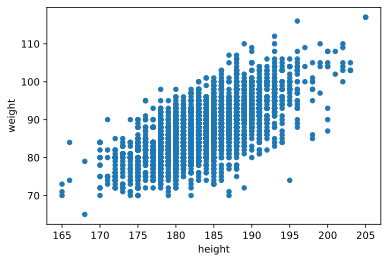

In [ ]:
df.plot(kind='scatter', x='height', y='weight')

_Замечание._ Совершенно оффтоп, но на всякий случай всё же отметим, что в обычных ситуациях рисовать scatter plot-ы в svg — дурацкая идея, потому что фактически каждая точка отрисовывается отдельно, поэтому такие картинки в векторном формате очень тяжёлые. Не делайте так.

Видим, что определённая зависимость есть: как правило, чем выше рост, тем выше вес.

Построим такую же диаграмму для другой пары признаков: `'height'` и `'age'`:

<AxesSubplot:xlabel='height', ylabel='age'>

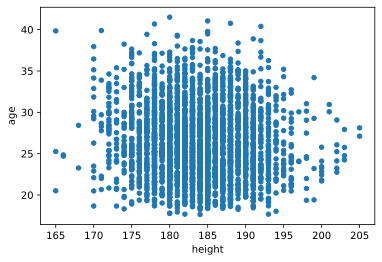

In [ ]:
df.plot(kind='scatter', x='height', y='age')

Видим, что настолько явной зависимости нет.

А теперь посчитаем корреляции этих признаков. Это можно сделать с помощью метода `.corr`, который есть у объектов `pandas.DataFrame`.

In [ ]:
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.693731
weight,0.693731,1.000000


В результате получается матрица корреляций. И действительно корреляция роста и веса достаточно высока.

Добавим сюда возраст:

In [ ]:
df[['height', 'weight', 'age']].corr()

,height,weight,age
height,1.000000,0.693731,-0.077862
weight,0.693731,1.000000,0.090665
age,-0.077862,0.090665,1.000000


Видно, что корреляция возраста достаточно низка как с ростом, так и с весом спортсменов.

### Взаимосвязь величин

Если две величины коррелируют, это может свидетельствовать о наличии _статистической связи_ между ними. Однако, говорить о ней мы можем только для величин из одной выборки. Корреляция величин в одной выборке не гарантирует того, что подобная связь встретится и в другой выборке и должна будет иметь такую же природу. 

Высокая корреляция между величинами не может быть интерпретирована как наличие причинно-следственной связи между ними.

Например, если рассмотреть данные о пожарах в городе, можно увидеть, что между материальными потерями, вызванными пожаром, и количеством пожарных, которые принимали участие в его тушении, есть сильная корреляция. При этом ложным будет вывод о том, что большое количество пожарных, присутствующих на пожаре, приводит к увеличению ущерба от него. 

Высокая корреляция двух величин может свидетельствовать о том, что у них есть _общая причина_, несмотря на то, что прямого взаимодействия между двумя коррелирующими величинами нет. 

Например, наступление зимы может быть причиной и  роста заболеваемости простудой, и повышения расходов на отопление. Эти две величины (число заболевших и расходы на отопление) имеют высокую корреляцию между собой, хотя они друг на друга напрямую не влияют.

Напротив, отсутствие корреляции между двумя величинами еще не говорит о том, что между показателями нет связи. 
Вполне возможно, что между признаками есть более сложная зависимость, например, имеется зависимость между тремя или более признаками, в то время как коэффициент корреляции выявляет лишь попарную корреляцию.

__Пример 2__

Посчитаем корреляцию между ростом и BMI (_Body Mass Index_, т.е. _Индекс массы тела_). BMI равен весу, разделённому на квадрат роста:
$$BMI = \dfrac{weight}{height^2}.$$

In [ ]:
df[['height', 'weight', 'bmi']].corr()

,height,weight,bmi
height,1.000000,0.693731,-0.067106
weight,0.693731,1.000000,0.670663
bmi,-0.067106,0.670663,1.000000


Как мы видим, коэффициент корреляции не улавливает зависимость между ростом и BMI, поскольку зависимость между этими признаками более сложная.

### Показатели корреляции

__Ковариация__ — мера линейной зависимости случайных величин. Её формула похожа на формулу дисперсии (_variance_). 

Формула ковариации случайных величин $X$ и $Y$:
$$\operatorname{cov}(X, Y) = M\left( (X - M(X)) (Y - M(Y)) \right).$$

Несмещённую оценку ковариации можно посчитать следующим образом:
$$\sigma_{XY} = \dfrac{1}{n - 1} \displaystyle\sum_{i = 1}^n \left( x_i - \overline{X} \right) \cdot \left( y_i - \overline{Y} \right)$$

Здесь $X$, $Y$ — выборки размера $n$.

__Пример 3__

Посчитаем ковариацию между ростом и весом хоккеистов.

In [ ]:
X = df['height']
Y = df['weight']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

26.715646388698516

Также с помощью `numpy`:

In [ ]:
import numpy as np

In [ ]:
np.cov(X, Y, ddof=1)

array([[29.89496367, 26.71564639],
       [26.71564639, 49.60799566]])

Эта функция возвращает не значение ковариации, а т.н. __матрицу ковариаций__. В ней по диагонали стоят вариации (т.е. дисперсии) каждой из выборок, а вне диагонали — попарные ковариации.

In [ ]:
X.var(), Y.var()

(29.894963668771, 49.60799565913306)

Значение ковариации случайных величин сильно зависит от уровня разброса каждой из величин. Например, если в предыдущем примере домножить одну из выборок на какую-то константу, коэффициент ковариации также увеличится:

In [ ]:
np.cov(X * 10, Y)

array([[2989.49636688,  267.15646389],
       [ 267.15646389,   49.60799566]])

Поэтому в качестве числовой характеристики зависимости случайных величин лучше использовать __коэффициент корреляции Пирсона__:
$$r_{XY} = \dfrac{\sigma_{XY}}{\sigma_X \cdot \sigma_Y}$$

Здесь $\sigma_X$, $\sigma_Y$ — среднее квадратическое отклонение.

__Пример 4__

Посчитаем коэффициент корреляции для выборок из предыдущего примера. Для вычисления средних квадратических отклонений воспользуемся методом `.std`, который по умолчанию вычисляет несмещённую оценку.

In [ ]:
corr = cov / (X.std() * Y.std())
corr

0.6937305679663021

Коэффициент корреляции Пирсона считается по умолчанию с помощью метода `.corr` объектов `pandas.DataFrame`, с помощью которого мы вычисляли корреляцию ранее:

In [ ]:
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.693731
weight,0.693731,1.000000


Ту же самую матрицу корреляций можно получить с помощью функции `numpy.corrcoef`.

In [ ]:
np.corrcoef(X, Y)

array([[1.        , 0.69373057],
       [0.69373057, 1.        ]])

Плюсы использования коэффициента Пирсона:
* Использует много информации (средние и отклонения выборок),
* Позволяет проводить тесты на значимость корреляции: статистика
$$t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}}$$
имеет распределение Стьюдента с $n - 2$ степенями свободы.

Минусы:
* Выборки должны иметь нормальное распределение,
* Измеряет уровень _линейной зависимости_.

__Ранговая корреляция__

Помимо линейной зависимости существует также понятие __ранговой__ (или __порядковой__) зависимости. Это тип зависимости, при котором увеличение значения одной случайной величины соответствует увеличению второй, а уменьшение первой — уменьшению второй. Однако, в отличие от линейной зависимости, при ранговой зависимости не требуется чтобы степень увеличения или уменьшения двух значений были линейно зависимы.

Высокое значение ранговой корреляции означает, что если отсортировать два массива по возрастанию первого, то второй также будет возрастать.

__Пример 5__

Сгенерируем выборку из равномерного распределения размера $100$. Вторую выборку получим, возведя первую в пятую степень. (Т.е. в этом случае имеем прямую зависимость между выборками.)

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

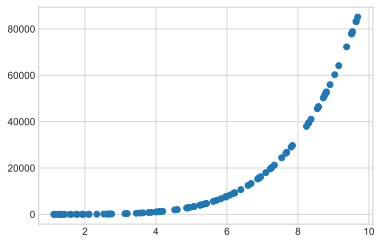

In [ ]:
x = np.random.uniform(low=1, high=10, size=100)
y = x ** 5

plt.scatter(x, y)

Посчитаем коэффициент корреляции Пирсона:

In [ ]:
np.corrcoef(x, y)

array([[1.        , 0.84170854],
       [0.84170854, 1.        ]])

Несмотря на наличие прямой зависимости между переменными, коэффициент корреляции Пирсона оказался не очень высоким. Причина в том, что, как мы уже отмечали, коэффициент Пирсона отражает уровень именно линейной зависимости.

Если нас интересует уровень зависимости вообще, ранговые показатели оказываются более полезными.

Популярными коэффициентами ранговой корреляции являются коэффициент Кендалла и коэффициент Спирмана. Мы здесь рассмотрим первый из них.

Допустим, $(x_1, y_1)$, ..., $(x_m, y_m)$ — все пары значений двух выборок. Две пары $(x_i, y_i)$ и $(x_j, y_j)$ называются __согласованными__, если $x_i < x_j$ и $y_i < y_j$, или наоборот $x_i > x_j$ и $y_i > y_j$. В противном случае они называются __несогласованными__. 

Пусть $P$ — число всех согласованных комбинаций из двух пар, а $Q$ — число всех несогласованных комбинаций двух пар. __Коэффициент корреляции Кендалла__:
$$\tau = \dfrac{P - Q}{P + Q}$$

_Замечание_. Такое определение коэффициента Кендалла возможно только если выборки $X$ и $Y$ не имеют повторов. Существуют уточнённые версии коэффициента Кендалла, допускающие повторы, но мы их здесь не приводим.

__Пример 5 (продолжение)__

Посчитаем коэффициент Кендалла для сравнения. Сперва сделаем это вручную.

In [ ]:
def is_concordant(pair1: tuple, pair2: tuple) -> bool:
    """Являются ли две пары согласованными.
    """
    
    
    return (pair1[0] - pair2[0]) * (pair1[1] - pair2[1]) > 0

Число согласованных и несогласованных пар посчитаем с использованием функции `combinations` из библиотеки `itertools`. Она возвращает итератор по всем сочетаниям из заданного набора.

In [ ]:
from itertools import combinations

In [ ]:
list(combinations(range(6), r=2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (4, 5)]

In [ ]:
list(zip(x, y))[:10]

[(5.337878067087433, 4333.544344338339),
 (2.533371521436686, 104.35047273643674),
 (5.236600640678849, 3937.7421340293236),
 (7.264786363259992, 20235.513857345875),
 (5.829197885513553, 6730.448313999814),
 (1.126994315422253, 1.8180617394462077),
 (5.990970740178666, 7717.666231020226),
 (5.963589947539137, 7542.9090305965765),
 (5.259275255586807, 4023.736251371512),
 (4.910879162234343, 2856.250147015329)]

In [ ]:
P = 0
Q = 0

for pair1, pair2 in combinations(zip(x, y), r=2):
    if is_concordant(pair1, pair2):
        P += 1
    else:
        Q += 1
        
P, Q

(4950, 0)

Итак, коэффициент:

In [ ]:
tau = (P - Q) / (P + Q)
tau

1.0

Готовая реализация коэффициента Кендалла есть в библиотеке `pandas`. В метод `.corr` нужно подать аргумент `method='kendall'`.

In [ ]:
pd.DataFrame({'x': x, 'y': y}).corr(method='kendall')

,x,y
x,1.0,1.0
y,1.0,1.0


Про уточнённые версии коэффициента Кендалла можно почитать, например, [здесь](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

Плюсы использования коэффициента Кендалла:
* Не требует нормальности распределений,
* Порядковая зависимость является обобщением линейной.

Минусы:
* Использует меньше информации, чем коэффициент Пирсона (соответствие значений между парами элементов),
* Прямое проведение тестов на значимость корреляции малореально.

In [ ]:
df[['height', 'weight', 'bmi', 'age']].corr(method='kendall')

,height,weight,bmi,age
height,1.000000,0.516862,-0.017306,-0.049925
weight,0.516862,1.000000,0.500093,0.062896
bmi,-0.017306,0.500093,1.000000,0.137567
age,-0.049925,0.062896,0.137567,1.000000


Для наглядного изображения матриц корреляции большого размера часто используют __тепловую карту__ (__heatmap__). Её реализация есть, например, в `seaborn`:

In [ ]:
import seaborn as sns

<AxesSubplot:>

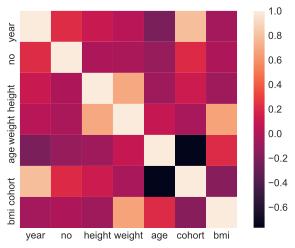

In [ ]:
sns.heatmap(df.corr(), square=True)

### Проверка на нормальность

Ранее мы неоднократно отмечали, что применимость того или иного метода сильно зависит от того, является ли распределение в нашей выборке нормальным. 

Методы проверки на нормальность делятся на 3 класса:
1. Графические методы:
    * Гистограмма,
    * Q-Q кривая,
2. Методы на основании правил разброса (стандартное отклонение, 2 сигмы, 3 сигмы),
3. Статистические методы:
    * Колмогорова-Смирнова,
    * Шапиро-Уилка,
    * ...

Как следует из названия, __графические методы__ используют для проверки на нормальность различные графики и диаграммы.

Например, по выборке можно построить гистограмму и оценить, насколько она «похожа» на гистограмму нормального распределения.

__Пример 6__

Построим гистограммы некоторых признаков из нашего датасета о хоккеистах. Поверх них нарисуем функции плотностей для нормальных распределений с соответствующими параметрами.

In [ ]:
from scipy import stats

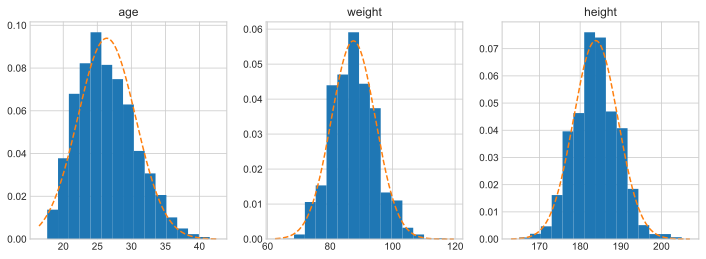

In [ ]:
keys = ['age', 'weight', 'height']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=15)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

Другой способ графически оценить нормальность выборки — __Q-Q кривая__ (или __кривая квантиль-квантиль__):
1. По данной выборке считаем выборочные среднее $a$ и среднее квадратическое отклонение $\sigma$.
2. Для каждого значения $\alpha \in (0, 1)$ откладываем по оси $x$ квантиль порядка $\alpha$ для нормального распределения с параметрами $a$, $\sigma$, а по оси $y$ — выборочный квантиль порядка $\alpha$.

Получившийся набор точек должен лежать на прямой $f(x) = x$.

__Пример 7__

Построим Q-Q кривую для выборок из предыдущего примера.

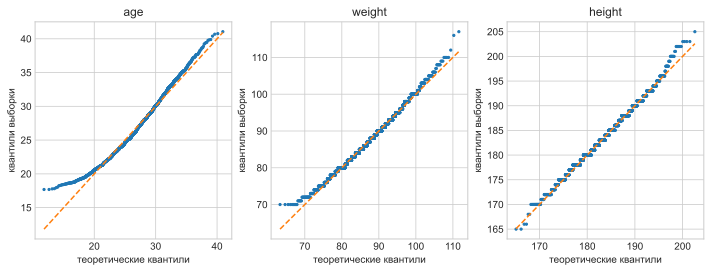

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(4 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')
    
    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

In [ ]:
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


Ещё один способ оценить нормальность выборки — известные нам правила разброса для нормального распределения:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Данные правила должны приблизительно выполняться для выборки из нормального распределения.

_Замечание_. Таким образом, методы на основании правил разброса не дают возможность установить нормальность, лишь её отсутствие.

__Пример 8__

Применим перечисленные выше правила для всё тех же двух выборок.

In [ ]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

age
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6675774134790529
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9638737097753491
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9963570127504554

weight
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.664541590771099
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9553734061930783
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9963570127504554

height
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.680327868852459
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9556769884638737
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9942319368548876



Наконец, существует несколько статистических методов, позволяющих «по-честному» проверить гипотезу о нормальности распределения. Например, часто для таких задач используются метод Колмогорова-Смирнова или [метод Шапиро-Уилка](https://en.wikipedia.org/wiki/Shapiro–Wilk_test).

Рассмотрим __критерий Колмогорова-Смирнова__. Для проведения теста нам понадобится _эмпирическая функция распределения_. Она строится по выборке $X = (x_1, \dots, x_n)$ следующим образом:
$$F_n(x) = \dfrac{1}{n} \displaystyle\sum_{i = 1}^n I_{x_i \leq x},$$
где $I_{x_i \leq x}$ — _индикаторная функция_:
$$I_{x_i \leq x} = \begin{cases}
1, & x_i \leq x, \\
0, & x_i > x.
\end{cases}$$

Итак, проверяется нулевая гипотеза о том, что данная выборка имеет нормальное распределение с параметрами $\mu$, $\sigma$. Пусть $F(x)$ — функция распределения для такого распределения.

__Статистика__ для критерия Колмогорова-Смирнова:
$$D_n = \displaystyle\sup_x |F_n(x) - F(x)|$$

В предположении нулевой гипотезы статистика $D_n$ имеет __распределение Колмогорова__ (`stats.ksone`) с параметром $n$, где $n$ — размер выборки. Критическая область правосторонняя, т.е. по выбранному уровню значимости $\alpha$ вычисляется квантиль $t_{1 - \alpha}$ распределения Колмогорова, затем проводится статистический тест с критической областью:
$$\Omega_\alpha = (t_{1 - \alpha}, \infty)$$

__Пример 9__

Проверим распределение роста хоккеистов на нормальность. Для этого определим эмпирическую функцию распределения:

In [ ]:
def edf(x: float) -> float:
    """Эмпирическая функция распределения роста хоккеистов.
    """
    
    samples = df['height']
    
    return samples[samples < x].shape[0] / samples.shape[0]

Кроме того, для проведения теста нам нужно иметь параметры распределения, с которым предстоит сравнивать распределение выборки. Поскольку этих параметров у нас нет, возьмём их выборочные оценки:
$$\mu = \overline{X}, \: \sigma = \sigma_X$$

_Замечание_. Вообще говоря, так поступать некорректно. Важно понимать, что выборочное среднее в общем случае не равно математическому ожиданию распределения, а выборочное среднее квадратическое отклонение не равно среднему квадратическому отклонению распределения. Получается, мы проверяем не гипотезу о том, что распределение выборки нормально, а что оно __нормально с именно такими параметрами__. Если в результате эта гипотеза подтвердится, то хорошо, однако, если гипотеза будет отвергнута, это, строго говоря, не означает, что распределение не является нормальным.

In [ ]:
mu = df['height'].mean()
sigma = df['height'].std()


def cdf(x: float) -> float:
    """Теоретическая функция распределения роста хоккеистов.
    """
    
    return stats.norm.cdf(x, loc=mu, scale=sigma)

Итак, посчитаем значение нашей статистики. Для наглядности изобразим график функции $|F_n(x) - F(x)|$:

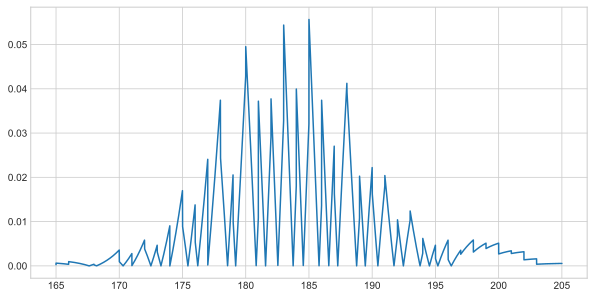

In [ ]:
x = np.linspace(df['height'].min(), df['height'].max(), 10000)
y = np.array([np.abs(edf(x0) - cdf(x0)) for x0 in x])

plt.figure(figsize=(10, 5))
plt.plot(x, y)

Значение статистики $D_n$ равно наибольшему отклонению теоретической функции распределения от эмпирической:

In [ ]:
D_n = y.max()
D_n

0.05565093116525699

Теперь построим критическую область. Для этого нужно посчитать квантиль порядка $1 - \alpha$ для распределения Колмогорова с параметром $n$. Возьмём $\alpha = 0.05$.

In [ ]:
alpha = 0.05

t = stats.ksone.ppf(1 - alpha, n=df.shape[0])
t

0.021273402287537584

Итак, наша критическая область имеет вид:
$$\Omega_\alpha = (0.0213, \infty)$$

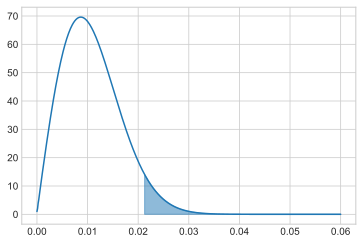

In [ ]:
ox = np.linspace(0, 0.06, 500)
oy = stats.ksone.pdf(ox, n=df.shape[0])

ox_right = np.linspace(t, ox[-1], 100)
oy_right = stats.ksone.pdf(ox_right, n=df.shape[0])

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Значение статистики попало в критическую область, следовательно, гипотеза о нормальности распределения отвергается.

Кстати, для теста Колмогорова-Смирнова существует готовая реализация с `scipy`. В функцию ниже нужно подать выборку, теоретическую функцию распределения, а также указать `alternative='greater'` для использования правосторонней области. Возвращает эта функция, как обычно, значение статистики и P-значение.

In [ ]:
stats.kstest(df['height'], cdf, alternative='greater')

KstestResult(statistic=0.0557935621212321, pvalue=1.179726725135357e-09)